In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import pytz

from sublimpy import variables
from sublimpy import utils
from sublimpy import tidy

import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

# Inputs

In [2]:
sos_download_dir='/data2/elilouis/sublimationofsnow/sosnoqc'
DATE_FORMAT_STR = '%Y%m%d'
# start_date = '20221201'
# end_date = dt.datetime.strftime(dt.date.today() - dt.timedelta(days=1), DATE_FORMAT_STR)
start_date = '20221130'
end_date = '20230517'
PLANAR_FIT = False




datelist = pd.date_range(
    dt.datetime.strptime(start_date, DATE_FORMAT_STR),
    dt.datetime.strptime(end_date, DATE_FORMAT_STR),
    freq='d'
).strftime(DATE_FORMAT_STR).tolist()

VARIABLE_NAMES = [
    # Sonic Anemometer Data for 4 towers
    'tc_1m_uw',     'spd_1m_uw',     'dir_1m_uw',     'u_1m_uw',   'v_1m_uw',   'w_1m_uw',   'u_u__1m_uw',    'v_v__1m_uw',    'w_w__1m_uw',    
        'u_w__1m_uw',    'v_w__1m_uw',  'u_tc__1m_uw',  'v_tc__1m_uw',   'u_h2o__1m_uw',  'v_h2o__1m_uw',   'w_tc__1m_uw',   'w_h2o__1m_uw',
    'tc_3m_uw',     'spd_3m_uw',     'dir_3m_uw',     'u_3m_uw',   'v_3m_uw',   'w_3m_uw',   'u_u__3m_uw',    'v_v__3m_uw',    'w_w__3m_uw',    
        'u_w__3m_uw',    'v_w__3m_uw',  'u_tc__3m_uw',  'v_tc__3m_uw',   'u_h2o__3m_uw',  'v_h2o__3m_uw',   'w_tc__3m_uw',   'w_h2o__3m_uw',
    'tc_10m_uw',    'spd_10m_uw',    'dir_10m_uw',    'u_10m_uw',  'v_10m_uw',  'w_10m_uw',  'u_u__10m_uw',   'v_v__10m_uw',   'w_w__10m_uw',   
        'u_w__10m_uw',   'v_w__10m_uw', 'u_tc__10m_uw', 'v_tc__10m_uw',  'u_h2o__10m_uw', 'v_h2o__10m_uw',  'w_tc__10m_uw',  'w_h2o__10m_uw',

    'tc_1m_ue',     'spd_1m_ue',     'dir_1m_ue',     'u_1m_ue',   'v_1m_ue',   'w_1m_ue',   'u_u__1m_ue',    'v_v__1m_ue',    'w_w__1m_ue',    
        'u_w__1m_ue',    'v_w__1m_ue',  'u_tc__1m_ue',  'v_tc__1m_ue',   'u_h2o__1m_ue',  'v_h2o__1m_ue',   'w_tc__1m_ue',   'w_h2o__1m_ue',
    'tc_3m_ue',     'spd_3m_ue',     'dir_3m_ue',     'u_3m_ue',   'v_3m_ue',   'w_3m_ue',   'u_u__3m_ue',    'v_v__3m_ue',    'w_w__3m_ue',    
        'u_w__3m_ue',    'v_w__3m_ue',  'u_tc__3m_ue',  'v_tc__3m_ue',   'u_h2o__3m_ue',  'v_h2o__3m_ue',   'w_tc__3m_ue',   'w_h2o__3m_ue',
    'tc_10m_ue',    'spd_10m_ue',    'dir_10m_ue',    'u_10m_ue',  'v_10m_ue',  'w_10m_ue',  'u_u__10m_ue',   'v_v__10m_ue',   'w_w__10m_ue',   
        'u_w__10m_ue',   'v_w__10m_ue', 'u_tc__10m_ue', 'v_tc__10m_ue',  'u_h2o__10m_ue', 'v_h2o__10m_ue',  'w_tc__10m_ue',  'w_h2o__10m_ue',

    'tc_1m_d',      'spd_1m_d',     'dir_1m_d',     'u_1m_d',   'v_1m_d',   'w_1m_d',   'u_u__1m_d',    'v_v__1m_d',    'w_w__1m_d',    
        'u_w__1m_d',    'v_w__1m_d',  'u_tc__1m_d',  'v_tc__1m_d',   'u_h2o__1m_d',  'v_h2o__1m_d',   'w_tc__1m_d',   'w_h2o__1m_d',
    'tc_3m_d',      'spd_3m_d',     'dir_3m_d',     'u_3m_d',   'v_3m_d',   'w_3m_d',   'u_u__3m_d',    'v_v__3m_d',    'w_w__3m_d',    
        'u_w__3m_d',    'v_w__3m_d',  'u_tc__3m_d',  'v_tc__3m_d',   'u_h2o__3m_d',  'v_h2o__3m_d',   'w_tc__3m_d',   'w_h2o__3m_d',
    'tc_10m_d',     'spd_10m_d',    'dir_10m_d',    'u_10m_d',  'v_10m_d',  'w_10m_d',  'u_u__10m_d',   'v_v__10m_d',   'w_w__10m_d',   
        'u_w__10m_d',   'v_w__10m_d', 'u_tc__10m_d', 'v_tc__10m_d',  'u_h2o__10m_d', 'v_h2o__10m_d',  'w_tc__10m_d',  'w_h2o__10m_d',

    'tc_2m_c',  'spd_2m_c',     'dir_2m_c',     'u_2m_c',   'v_2m_c',   'w_2m_c',   'u_u__2m_c',    'v_v__2m_c',    'w_w__2m_c',    
        'u_w__2m_c',    'v_w__2m_c',  'u_tc__2m_c',  'v_tc__2m_c',   'u_h2o__2m_c',  'v_h2o__2m_c',   'w_tc__2m_c',   'w_h2o__2m_c',
    'tc_3m_c',  'spd_3m_c',     'dir_3m_c',     'u_3m_c',   'v_3m_c',   'w_3m_c',   'u_u__3m_c',    'v_v__3m_c',    'w_w__3m_c',    
        'u_w__3m_c',    'v_w__3m_c',  'u_tc__3m_c',  'v_tc__3m_c',   'u_h2o__3m_c',  'v_h2o__3m_c',   'w_tc__3m_c',   'w_h2o__3m_c',
    'tc_5m_c',  'spd_5m_c',     'dir_5m_c',     'u_5m_c',   'v_5m_c',   'w_5m_c',   'u_u__5m_c',    'v_v__5m_c',    'w_w__5m_c',    
        'u_w__5m_c',    'v_w__5m_c',  'u_tc__5m_c',  'v_tc__5m_c',   'u_h2o__5m_c',  'v_h2o__5m_c',   'w_tc__5m_c',   'w_h2o__5m_c',
    'tc_10m_c', 'spd_10m_c',    'dir_10m_c',    'u_10m_c',  'v_10m_c',  'w_10m_c',  'u_u__10m_c',   'v_v__10m_c',   'w_w__10m_c',   
        'u_w__10m_c',   'v_w__10m_c', 'u_tc__10m_c', 'v_tc__10m_c',  'u_h2o__10m_c', 'v_h2o__10m_c',  'w_tc__10m_c',  'w_h2o__10m_c',
    'tc_15m_c', 'spd_15m_c',    'dir_15m_c',    'u_15m_c',  'v_15m_c',  'w_15m_c',  'u_u__15m_c',   'v_v__15m_c',   'w_w__15m_c',   
        'u_w__15m_c',   'v_w__15m_c', 'u_tc__15m_c', 'v_tc__15m_c',  'u_h2o__15m_c', 'v_h2o__15m_c',  'w_tc__15m_c',  'w_h2o__15m_c',
    'tc_20m_c', 'spd_20m_c',    'dir_20m_c',    'u_20m_c',  'v_20m_c',  'w_20m_c',  'u_u__20m_c',   'v_v__20m_c',   'w_w__20m_c',   
        'u_w__20m_c',   'v_w__20m_c', 'u_tc__20m_c', 'v_tc__20m_c',  'u_h2o__20m_c', 'v_h2o__20m_c',  'w_tc__20m_c',  'w_h2o__20m_c',

    
    # Temperature & Relative Humidity Array 
    'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c', 'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c',
    'T_11m_c', 'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c', 'T_16m_c', 'T_17m_c', 'T_18m_c', 'T_19m_c', 'T_20m_c',

    'RH_2m_c', 'RH_3m_c', 'RH_4m_c', 'RH_5m_c', 'RH_6m_c', 'RH_7m_c', 'RH_8m_c', 'RH_9m_c', 'RH_10m_c',
    'RH_11m_c','RH_12m_c','RH_13m_c','RH_14m_c','RH_15m_c','RH_16m_c','RH_17m_c','RH_18m_c','RH_19m_c','RH_20m_c',

    # Pressure Sensors
    'P_20m_c',
    'P_10m_c', 'P_10m_d', 'P_10m_uw', 'P_10m_ue',

    # Blowing snow/FlowCapt Sensors
    'SF_avg_1m_ue', 'SF_avg_2m_ue',

    # Apogee sensors
    "Vtherm_c", "Vtherm_d", "Vtherm_ue", "Vtherm_uw", 
    "Vpile_c", "Vpile_d", "Vpile_ue", "Vpile_uw",
    "IDir_c", "IDir_d", "IDir_ue", "IDir_uw",

    # Snow-level temperature arrays (towers D and UW)
    'Tsnow_0_4m_d', 'Tsnow_0_5m_d', 'Tsnow_0_6m_d', 'Tsnow_0_7m_d', 'Tsnow_0_8m_d', 'Tsnow_0_9m_d', 'Tsnow_1_0m_d', 'Tsnow_1_1m_d', 'Tsnow_1_2m_d', 'Tsnow_1_3m_d', 'Tsnow_1_4m_d', 'Tsnow_1_5m_d',
    'Tsnow_0_4m_uw', 'Tsnow_0_5m_uw', 'Tsnow_0_6m_uw', 'Tsnow_0_7m_uw', 'Tsnow_0_8m_uw', 'Tsnow_0_9m_uw', 'Tsnow_1_0m_uw', 'Tsnow_1_1m_uw', 'Tsnow_1_2m_uw', 'Tsnow_1_3m_uw', 'Tsnow_1_4m_uw', 'Tsnow_1_5m_uw',
    
    # Downward Facing Longwave Radiometer (tower D) - for measuring snow surface temperature
    'Rpile_out_9m_d',
    'Tcase_out_9m_d',
    
    # Upward Facing Longwave Radiometer (tower D)
    'Rpile_in_9m_d',
    'Tcase_in_9m_d',
    
    # Upward facing shortwave radiometer (tower D) - for measuring incoming solar radiation!
    'Rsw_in_9m_d',
    'Rsw_out_9m_d',

    # Snow Pillow SWE
    'SWE_p1_c', 'SWE_p2_c', 'SWE_p3_c', 'SWE_p4_c',

    # Soil Moisture
    'Qsoil_d',
]

# Download and Clean SoS data

In [3]:
sos_ds = utils.download_sos_data(start_date, end_date, VARIABLE_NAMES, sos_download_dir, cache=True, planar_fit=False)

Caching...skipping download for 20221130


Caching...skipping download for 20221201
Caching...skipping download for 20221202
Caching...skipping download for 20221203
Caching...skipping download for 20221204
Caching...skipping download for 20221205
Caching...skipping download for 20221206
Caching...skipping download for 20221207
Caching...skipping download for 20221208
Caching...skipping download for 20221209
Caching...skipping download for 20221210
Caching...skipping download for 20221211
Caching...skipping download for 20221212
Caching...skipping download for 20221213
Caching...skipping download for 20221214
Caching...skipping download for 20221215
Caching...skipping download for 20221216
Caching...skipping download for 20221217
Caching...skipping download for 20221218
Caching...skipping download for 20221219
Caching...skipping download for 20221220
Caching...skipping download for 20221221
Caching...skipping download for 20221222
Caching...skipping download for 20221223
Caching...skipping download for 20221224
Caching...skippi

In [4]:
example = xr.open_dataset(os.path.join(sos_download_dir, "isfs_20230513.nc"))
example2 = xr.open_dataset(os.path.join(sos_download_dir, "isfs_20230511.nc"))

# Add Variables

In [5]:
sos_ds = variables.add_longwave_radiation(sos_ds)
sos_ds = variables.add_surface_temps(sos_ds)
sos_ds = variables.add_potential_virtual_temperatures(sos_ds)
sos_ds = variables.add_surface_potential_virtual_temperatures(sos_ds)
sos_ds = variables.add_tke(sos_ds)
sos_ds = variables.add_gradients_and_ri(sos_ds)
sos_ds = variables.add_obukhov_length(sos_ds)

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(-10.0, 10.0)

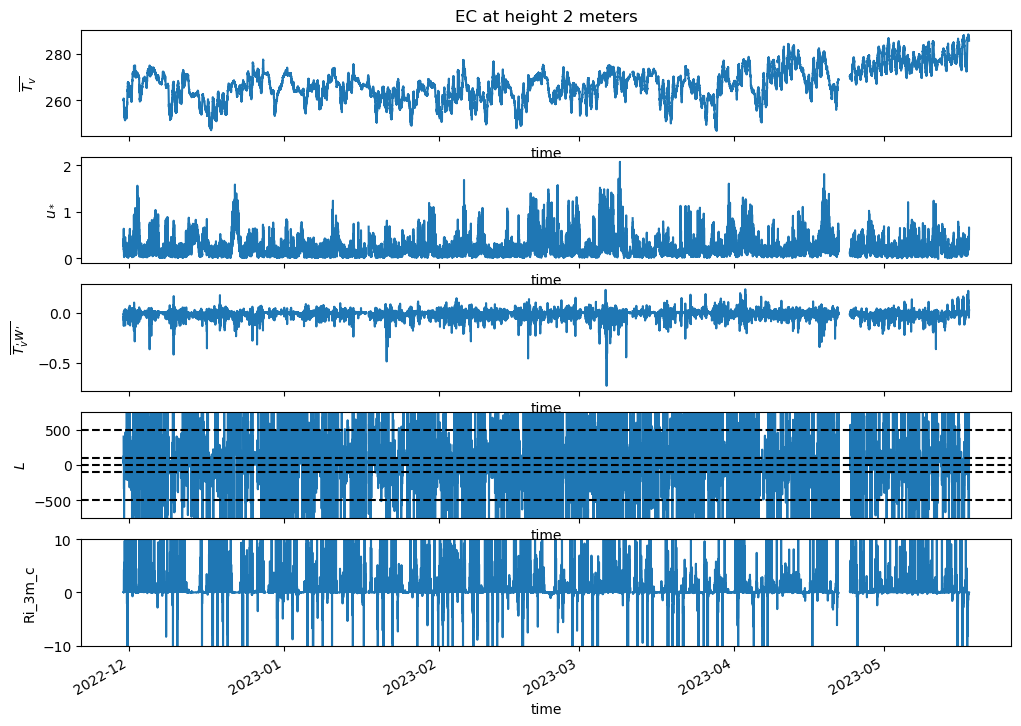

In [6]:
i = 2
fig, axes = plt.subplots(5, 1, figsize=(12,8), sharex=True)

(sos_ds[f'Tpotvirtual_{i}m_c']+273.15)

(sos_ds[f'Tvirtual_{i}m_c'] + 273.15).plot(ax = axes[0])
axes[0].set_ylabel(r'$\overline{T_v}$')

sos_ds[f'u*_{i}m_c'].plot(ax = axes[1])
axes[1].set_ylabel(r'$u_*$')

sos_ds[f'w_tc__{i}m_c'].plot(ax = axes[2])
axes[2].set_ylabel(r'$\overline{T_v^, w^,}$')

sos_ds[f'L_{i}m_c'].plot(ax = axes[3])
axes[3].axhline(-500, color='k', linestyle='--')
axes[3].axhline(-100, color='k', linestyle='--')
axes[3].axhline(0, color='k', linestyle='--')
axes[3].axhline(100, color='k', linestyle='--')
axes[3].axhline(500, color='k', linestyle='--')
axes[3].set_ylim(-750,750)
axes[3].set_ylabel(r'$L$')

axes[0].set_title(f"EC at height {i} meters")

sos_ds[f'Ri_3m_c'].plot(ax = axes[4])
axes[4].set_ylim(-10,10)

In [7]:
src = sos_ds[
    ['Tsurf_c', 'Tsurfplanck_c', 'Tsurf_d', 'Tsurfplanck_d', 'Tsurf_rad_d']
].to_dataframe().loc["2023-02-01": "2023-02-07"].reset_index()
src = src.set_index("time").groupby(pd.Grouper(freq='30Min')).mean().reset_index()
(
alt.Chart(
    src
).mark_line(strokeWidth=2).transform_fold(
    ['Tsurf_c', 'Tsurfplanck_c', 'Tsurf_d', 'Tsurfplanck_d', 'Tsurf_rad_d']
).encode(
    alt.X("time:T"),
    alt.Y("value:Q").title("Surface temperature (˚C)").scale(zero=False),
    alt.Color("key:N").title("Measurement")
).properties(width=800, height = 400) & \
alt.Chart(
    src.set_index('time').loc["2023-02-03 0200": "2023-02-03 1400"].reset_index()
).mark_line(strokeWidth=2).transform_fold(
    ['Tsurf_c', 'Tsurfplanck_c', 'Tsurf_d', 'Tsurfplanck_d', 'Tsurf_rad_d']
).encode(
    alt.X("time:T"),
    alt.Y("value:Q").title("Surface temperature (˚C)").scale(zero=False),
    alt.Color("key:N").title("Measurement")
).properties(width=800, height = 400)).display(renderer='svg') 

alt.VConcatChart(...)

In [8]:
(src['Tsurf_c'] - src['Tsurfplanck_c']).mean(), (src['Tsurf_d'] - src['Tsurfplanck_d']).mean()

(0.2870425, 0.28856778)

# Get Tidy Dataset

In [9]:
tidy_df = tidy.get_tidy_dataset(sos_ds, list(sos_ds.data_vars))

In [10]:
tidy_df = utils.modify_df_timezone(tidy_df, pytz.UTC, pytz.timezone('US/Mountain'))

Which variables did not get a "measurement" name assigned?

In [11]:
variables_with_no_measurement = tidy_df[tidy_df.measurement.apply(lambda x: x is None)].variable.unique()
variables_with_no_measurement

array(['Tcase_in_9m_d', 'Rpile_in_9m_d', 'Tcase_out_9m_d',
       'Rpile_out_9m_d'], dtype=object)

# Calculate additional new variables

## Net LW and Net SW

In [12]:
## Add Net LW variable
net_lw_radiation_values = (
        tidy_df.query("variable == 'Rlw_in_9m_d'")['value'].values
        -
        tidy_df.query("variable == 'Rlw_out_9m_d'")['value'].values
    )
tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    net_lw_radiation_values,
    'Rlw_net_9m_d',
    'longwave net radiation',
    9,
    'd'
)

## Add Net SW variable
net_sw_radiation_values = (
        tidy_df.query("variable == 'Rsw_in_9m_d'")['value'].values
        -
        tidy_df.query("variable == 'Rsw_out_9m_d'")['value'].values
    )
tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    net_sw_radiation_values,
    'Rsw_net_9m_d',
    'shortwave net radiation',
    9,
    'd'
)

## Net Radiation

In [13]:
## Add Net Rad variable
net_radiation_values = (
    (
        tidy_df.query("variable == 'Rsw_in_9m_d'")['value'].values
        +
        tidy_df.query("variable == 'Rlw_in_9m_d'")['value'].values
    ) - (
        tidy_df.query("variable == 'Rsw_out_9m_d'")['value'].values
        +
        tidy_df.query("variable == 'Rlw_out_9m_d'")['value'].values
    )
)
tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    net_radiation_values,
    'Rnet_9m_d',
    'net radiation',
    9,
    'd'
)

## Specific humidity

In [14]:
from metpy.calc import specific_humidity_from_mixing_ratio
from metpy.units import units
import xarray as xr
import pint_xarray

for v in [
    'Tsurfmixingratio_c',
    'mixingratio_2m_c',
    'mixingratio_3m_c',
    'mixingratio_4m_c',
    'mixingratio_5m_c',
    'mixingratio_6m_c',
    'mixingratio_7m_c',
    'mixingratio_8m_c',
    'mixingratio_9m_c',
    'mixingratio_10m_c',
    'mixingratio_11m_c',
    'mixingratio_12m_c',
    'mixingratio_13m_c',
    'mixingratio_14m_c',
    'mixingratio_15m_c',
    'mixingratio_16m_c',
    'mixingratio_17m_c',
    'mixingratio_18m_c',
    'mixingratio_19m_c',
    'mixingratio_20m_c',
]:
    data = tidy_df[tidy_df.variable == v]
    specific_humidity_values = specific_humidity_from_mixing_ratio(
        xr.DataArray(data.value.values)*units('g/g')
    ).values
    tidy_df = tidy.tidy_df_add_variable(
        tidy_df,
        specific_humidity_values,
        v.replace('mixingratio', 'specifichumidity'),
        'specific humidity',
        data.height.iloc[0],
        data.tower.iloc[0]
    )

## Mixing ratio gradient

In [15]:
new_variable = (
    tidy_df.query("variable == 'mixingratio_3m_c'").value.values
    - tidy_df.query("variable == 'Tsurfmixingratio_c'").value.values
) / 3

tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    new_variable,
    "q_gradient_3m_c",
    "mixing ratio gradient",
    3,
    'c'
)

## Rotated momentum flux variables

In [16]:
tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    (
        tidy_df.query("variable == 'u_w__3m_c'")['value'].values**2 
        + tidy_df.query("variable == 'v_w__3m_c'")['value'].values**2
    ),
    'u_w_rot__3m_c',
    'u_w_rot__',
    3,
    'c'
)

tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    (
        tidy_df.query("variable == 'u_w__10m_c'")['value'].values**2 
        + tidy_df.query("variable == 'v_w__10m_c'")['value'].values**2
    ),
    'u_w_rot__10m_c',
    'u_w_rot__',
    10,
    'c'
)

tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    (
        tidy_df.query("variable == 'u_w__20m_c'")['value'].values**2 
        + tidy_df.query("variable == 'v_w__20m_c'")['value'].values**2
    ),
    'u_w_rot__20m_c',
    'u_w_rot__',
    20,
    'c'
)


# Add Snow Depth and "True Height" variables

Open snow depth data

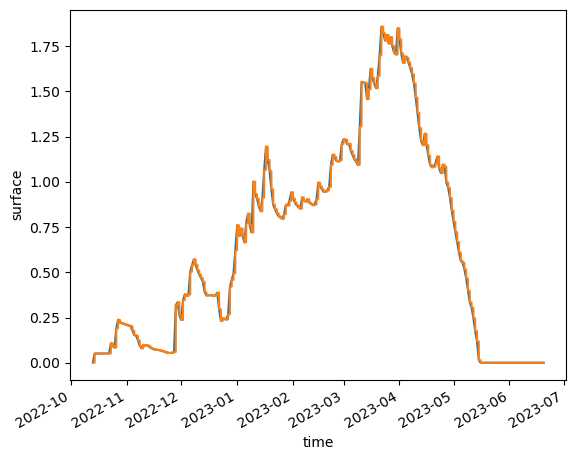

In [17]:
lidar_snowdepth_da = xr.open_dataset("/data2/elilouis/sublimationofsnow/lidar_snow_depth/D_from_D_l6.nc").resample(time = "1440Min").mean()['surface']
lidar_snowdepth_da = lidar_snowdepth_da.interpolate_na('time')
lidar_snowdepth_da = lidar_snowdepth_da.where(lidar_snowdepth_da > 0, 0)
lidar_snowdepth_upsample_da = lidar_snowdepth_da.resample(time = '5Min', ).pad()
lidar_snowdepth_upsample_da = lidar_snowdepth_upsample_da.assign_coords(time = pd.to_datetime(lidar_snowdepth_upsample_da.time) + dt.timedelta(minutes=2.5))

lidar_snowdepth_da.plot()
lidar_snowdepth_upsample_da.plot()

In [18]:
snowdepth_df = lidar_snowdepth_upsample_da.loc[
    tidy_df.time.min():tidy_df.time.max()
].to_dataframe()


# Option 2: Add as a variable
snowdepth_df = snowdepth_df.reset_index()
snowdepth_df = snowdepth_df[snowdepth_df.time.isin(tidy_df.time.unique())]
snowdepth_df

,time,surface
0,2022-11-29 17:02:30,0.334301
1,2022-11-29 17:07:30,0.334301
2,2022-11-29 17:12:30,0.334301
3,2022-11-29 17:17:30,0.334301
4,2022-11-29 17:22:30,0.334301
...,...,...
48679,2023-05-17 17:37:30,0.000000
48680,2023-05-17 17:42:30,0.000000
48681,2023-05-17 17:47:30,0.000000
48682,2023-05-17 17:52:30,0.000000


In [19]:
len(tidy_df.time.unique())

48672

In [20]:
tidy_df = tidy.tidy_df_add_variable(
    tidy_df,
    snowdepth_df.surface.values,
    'SnowDepth_d',
    'snow depth',
    10,
    'd'
)


# Calculate 30 Minute averages

In [21]:
tidy_df_30Min = pd.DataFrame(
    tidy_df.set_index('time').groupby(
        ['measurement', 'variable', 'height',  'tower']
    )['value'].resample('30Min').mean()
).reset_index()

# Calculate Penman-Monteith and Priestley-Taylor estimates of sublimation

In [22]:
from metpy.units import units
import pint_pandas

### Gather the data we need

In [23]:
pyet_src = tidy_df_30Min[tidy_df_30Min.variable.isin([
    'Rnet_9m_d',
    'airdensity_3m_c',
    'Tsurfvaporpressure_c',
    'vaporpressure_3m_c',
    'T_3m_c',
    'spd_3m_c',
    'P_10m_c'
])].pivot_table(
    index=['time'],
    values='value',
    columns='variable'
# Calculate means across 30min periods, mins and maxes for the required variables too
).reset_index()
pyet_src.head(2)

variable,time,P_10m_c,Rnet_9m_d,T_3m_c,Tsurfvaporpressure_c,airdensity_3m_c,spd_3m_c,vaporpressure_3m_c
0,2022-11-29 17:00:00,713.159607,-57.467264,-12.797492,235.782582,0.95436,3.323426,149.831121
1,2022-11-29 17:30:00,713.428101,-79.222653,-13.050861,226.665552,0.95583,4.556745,114.146005


In [24]:
# From PyET code
# Equation for calculating the latent heat of vaporization from:
# Richard G Allen, Luis S Pereira, Dirk Raes, Martin Smith, and others. Crop evapotranspiration-Guidelines for computing crop 
# water requirements-FAO Irrigation and drainage paper 56. Fao, Rome, 300(9):D05109, 1998.
pyet_src['L_v estimated'] = 2.501 - 0.002361 * pyet_src['T_3m_c']

### Define function

In [25]:
import pyet

In [26]:
def calc_delta_alduchov(t_in_c):
# Taking the derivative of the Alduchov curve
# returns in kPa
    numerator = 37836.5*np.exp((22.587*t_in_c)/(273.86+t_in_c))
    denominator = (t_in_c + 273.86)**2
    # 0.1 to convert from millibars to kPa
    return 0.1*numerator/denominator

def calc_psychrometric_constant(C_p, P, L_v):
    # C_p in MJ/kg/˚C
    # P in kPa
    # L_v in MJ/kg
    # From wikipedia
    # https://en.wikipedia.org/wiki/Psychrometric_constant#cite_note-1
    # which cites this:
    #  Allen, R.G.; Pereira, L.S.; Raes, D.; Smith, M. (1998). Crop Evapotranspiration—Guidelines for Computing Crop Water Requirements. 
    # FAO Irrigation and drainage paper 56. Rome, Italy: Food and Agriculture Organization of the United Nations. ISBN 92-5-104219-5. Retrieved 2007-10-08.
    return C_p*P/(0.622 * L_v)

In [27]:
C_p = 1.013 * 10 ** -3  # MJ/kg/K

def penman_monteith(
    energy_available, # MJ/m^2/day
    density_air, # kg/m^3
    vapor_pressure_surface, # kPa
    vapor_pressure_air, # kPa
    temp_air, # ˚C
    pressure, # kPa
    wind_speed, # m/s
    L_v
):
    A = energy_available
    rho_a = density_air
    e_s = vapor_pressure_surface
    e_a = vapor_pressure_air
    
    # delta = pyet.calc_vpc(temp_air)
    delta = calc_delta_alduchov(temp_air)
    y = calc_psychrometric_constant(C_p, pressure, L_v)
    r_a = pyet.calc_res_aero(wind_speed) # I should replace this with some better method for estimating atmospheric resistance - i.e. see Mahrt and Vickers, 2005, i.e. r_a = 1/(wind_speed * C_q)
    r_s = 0

    numerator = delta*A + rho_a*86400*C_p*(e_s - e_a)/r_a
    denominator = delta + y*(1 + r_s / r_a)
    return (1/L_v)*(numerator/denominator)

### Do calculations

In [28]:
pyet_src['pm results'] = penman_monteith(
    (pyet_src['Rnet_9m_d'].to_xarray() * units("W/m^2")).pint.to("MJ/m^2/day").values,
    pyet_src['airdensity_3m_c'].values,
    (pyet_src['Tsurfvaporpressure_c'].to_xarray() * units("Pa")).pint.to("kPa").values,
    (pyet_src['vaporpressure_3m_c'].to_xarray() * units("Pa")).pint.to("kPa").values,
    pyet_src['T_3m_c'].values,
    (pyet_src['P_10m_c'].to_xarray() * units("millibars")).pint.to("kPa").values,
    pyet_src['spd_3m_c'].values,
    pyet_src['L_v estimated'].values
)

## Convert from mm/day to g/m^2/s

In [29]:
pyet_src['pm results'] = pyet_src['pm results']/(86.4)

<AxesSubplot: xlabel='time'>

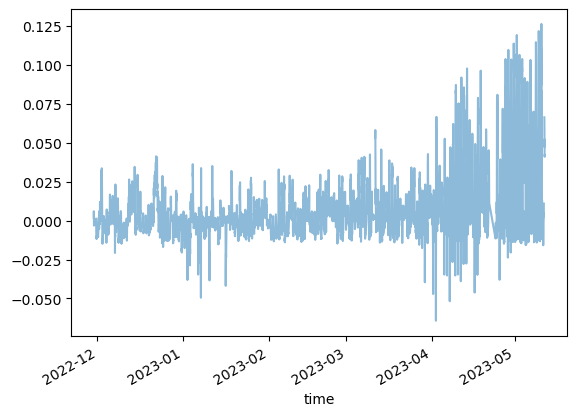

In [30]:
pyet_src.set_index('time')['pm results'].plot(alpha=0.5)

<AxesSubplot: xlabel='time'>

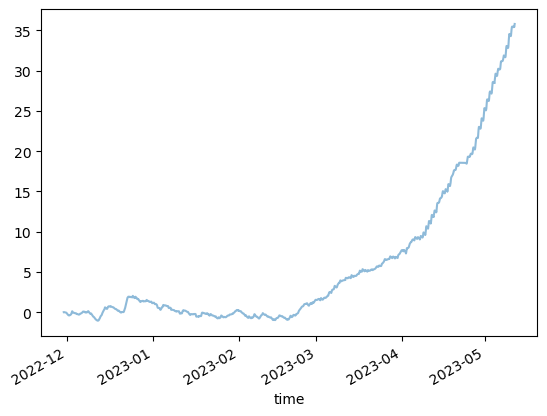

In [31]:
pyet_src.set_index('time')['pm results'].cumsum().plot(alpha=0.5)

## Add to tidy df

Fill missing timestamps with NaNs

In [42]:
pm_values = tidy_df_30Min.query("variable == 'spd_3m_c'").merge(
    pyet_src[['time', 'pm results']],
    on='time',
    how='left'
)['pm results'].values

In [43]:
tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min,
    pm_values,
    f'w_h2o__3m_c predicted (Penman Monteith)',
    'w_h2o_',
    3,
    'c'
)

# Calculate turbulent fluxes with MOST (my iterative solution using the MOST class)

In [44]:
import pint_xarray
from metpy.calc import specific_humidity_from_mixing_ratio
from metpy.units import units

Prepare the input data we need

In [45]:
# EXTRACT VARIABLES
VARIABLES = [
    ## Input Variables
    'spd_3m_c',
    'Tpot_3m_c',
    'Tsurfpot_c',
    'airdensity_3m_c',
    'mixingratio_3m_c',
    'Tsurfmixingratio_c',
    'T_3m_c',
    ## Measurement Variables
    'w_h2o__3m_c',
    'w_tc__3m_c',
    'u*_3m_c',
    'Ri_3m_c',
]
print([ v for v in tidy_df_30Min.variable.unique() if v in VARIABLES ])

# CREATE WIDE DATAFRAME
variables_df = tidy_df_30Min[tidy_df_30Min.variable.isin(VARIABLES)].pivot_table(
    values = 'value',
    index = 'time',
    columns='variable'
).reset_index()

# MAKE CONVERSIONS
# convert from ˚C to K
variables_df['T_3m_c'] = variables_df['T_3m_c'] + 273.15
variables_df['Tpot_3m_c'] = variables_df['Tpot_3m_c'] + 273.15
variables_df['Tsurfpot_c'] = variables_df['Tsurfpot_c'] + 273.15
# comes in units of g/g
variables_df['specifichumidity_3m_c'] = specific_humidity_from_mixing_ratio(
    xr.DataArray(variables_df['mixingratio_3m_c'])*units('g/g')
).pint.to('g/kg').values
# comes in units of g/g,  solution requires it in units of g/kg
variables_df['specifichumidity_surface_c'] = specific_humidity_from_mixing_ratio(
    xr.DataArray(variables_df['Tsurfmixingratio_c'])*units('g/g')
).pint.to('g/kg').values

# CREATE MEASUREMENT HEIGHT VARIABLES
variables_df['measurement_height'] = 3

['airdensity_3m_c', 'Tsurfmixingratio_c', 'mixingratio_3m_c', 'Tpot_3m_c', 'Ri_3m_c', 'u*_3m_c', 'Tsurfpot_c', 'T_3m_c', 'w_h2o__3m_c', 'w_tc__3m_c', 'spd_3m_c']


In [46]:
import sys
sys.path.append('../paper1/')
from most import MOST, StabilityFunctionBrutsaert1982

most_config_dict = {
    0.0001: MOST(StabilityFunctionBrutsaert1982(), snow_surface_roughness = 0.0001),
    0.0005: MOST(StabilityFunctionBrutsaert1982(), snow_surface_roughness = 0.0005),
    0.001: MOST(StabilityFunctionBrutsaert1982(), snow_surface_roughness = 0.001),
    0.005: MOST(StabilityFunctionBrutsaert1982(), snow_surface_roughness = 0.005),
}

for z0, this_most in most_config_dict.items():
    L_solutions, u_friction_solutions, H_solutions, E_solutions = this_most.solve(
        variables_df['spd_3m_c'],
        variables_df['Tpot_3m_c'],
        variables_df['Tsurfpot_c'],
        variables_df['airdensity_3m_c'],
        variables_df['specifichumidity_3m_c'],
        variables_df['specifichumidity_surface_c'],
        variables_df['T_3m_c'],
        variables_df['measurement_height']
    )

    variables_df[f'L_solution_z0_{str(z0)}'] = L_solutions
    variables_df[f'u_friction_solution_z0_{str(z0)}'] = u_friction_solutions
    variables_df[f'H_solution_z0_{str(z0)}'] = H_solutions
    variables_df[f'E_solution_z0_{str(z0)}'] = E_solutions

    # convert from W/m^2 to ˚C*m/s
    variables_df[f'H_solution_z0_{str(z0)}'] = (variables_df[f'H_solution_z0_{str(z0)}']/(variables_df['airdensity_3m_c']*0.718*1000))

Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
Reached maximum iterations
R

Add nans for the model results where there are missing timesteps (As compared to the tidy dataset of measurements)

In [47]:
variables_df['time'] = pd.to_datetime(variables_df['time'])

variables_df = pd.merge(
    tidy_df_30Min.query("variable == 'w_h2o__3m_c'")[['time']],
    variables_df,
    on='time',
    how='outer'
)

# Add solutions to the tidy dataset

In [48]:
# OUR SOLUTIONS
for z0 in most_config_dict.keys():
    tidy_df_30Min = tidy.tidy_df_add_variable(
        tidy_df_30Min,  
        variables_df[f'L_solution_z0_{z0}'], 
        f'L predicted ({z0})',
        'Obukhov length', 
        3,
        'c'
    )

    tidy_df_30Min = tidy.tidy_df_add_variable(
        tidy_df_30Min, 
        variables_df[f'u_friction_solution_z0_{z0}'], 
        f'u*_3m_c predicted ({z0})',
        'shear velocity', 
        3,
        'c'
    )

    tidy_df_30Min = tidy.tidy_df_add_variable(
        tidy_df_30Min, 
        variables_df[f'H_solution_z0_{z0}'], 
        f'w_tc__3m_c predicted ({z0})',
        'w_tc_', 
        3,
        'c'
    )

    tidy_df_30Min = tidy.tidy_df_add_variable(
        tidy_df_30Min, 
        variables_df[f'E_solution_z0_{z0}'], 
        f'w_h2o__3m_c predicted ({z0})',
        'w_h2o_', 
        3,
        'c'
    )

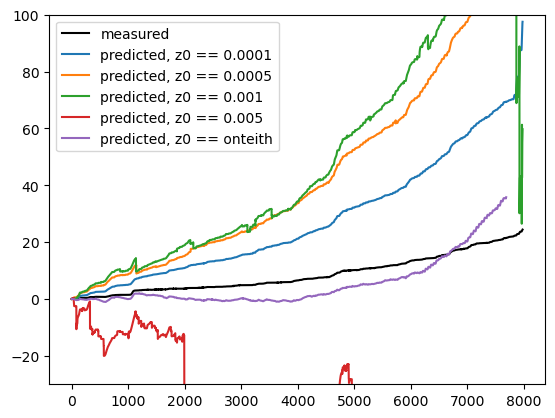

In [49]:
src = tidy_df_30Min[tidy_df_30Min.measurement == 'w_h2o_'].pivot_table(
    values = 'value',
    index = 'time',
    columns='variable'
).reset_index()


src['w_h2o__5m_c'].cumsum().plot(color='black', label='measured')
for col in [c for c in src.columns if 'predicted' in c]:
    src[col].cumsum().plot(label = f"predicted, z0 == {col.split(' ')[-1][1:-1]}")
plt.ylim(-30,100)
plt.legend()

# Save dataset

In [50]:
ls -lah | grep parquet

-rw-rw-r--. 1 elilouis elilouis 349K Jul 26 16:12 precip_rate.parquet
-rw-rw-r--. 1 elilouis elilouis 172M Jun 21 22:13 tidy_df_20221130_20230509_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis 196M Oct 24 11:22 tidy_df_20221130_20230517_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  29M Jun 21 22:13 tidy_df_30Min_20221130_20230509_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  35M Oct 24 11:22 tidy_df_30Min_20221130_20230517_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  26M May 23 21:41 tidy_df_30Min_20221201_20230501_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  18M May 18 19:33 tidy_df_30Min_20221201_20230501_planar_fit.parquet


In [51]:
if PLANAR_FIT:
    tidy_df_30Min.to_parquet(f'tidy_df_30Min_{start_date}_{end_date}_planar_fit.parquet', index=False)
    tidy_df.to_parquet(f'tidy_df_{start_date}_{end_date}_planar_fit.parquet', index=False)
else:
    tidy_df_30Min.to_parquet(f'tidy_df_30Min_{start_date}_{end_date}_noplanar_fit.parquet', index=False)
    tidy_df.to_parquet(f'tidy_df_{start_date}_{end_date}_noplanar_fit.parquet', index=False)

In [52]:
ls -lah | grep parquet

-rw-rw-r--. 1 elilouis elilouis 349K Jul 26 16:12 precip_rate.parquet
-rw-rw-r--. 1 elilouis elilouis 172M Jun 21 22:13 tidy_df_20221130_20230509_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis 204M Oct 24 20:57 tidy_df_20221130_20230517_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  29M Jun 21 22:13 tidy_df_30Min_20221130_20230509_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  36M Oct 24 20:57 tidy_df_30Min_20221130_20230517_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  26M May 23 21:41 tidy_df_30Min_20221201_20230501_noplanar_fit.parquet
-rw-rw-r--. 1 elilouis elilouis  18M May 18 19:33 tidy_df_30Min_20221201_20230501_planar_fit.parquet


# Create disdrometer dataset with a "days since precip" variable

## Load disdrometer data

In [ ]:
import act

In [ ]:
# files = act.discovery.download_data(
#     os.getenv("ARM_USERNAME"),
#     os.getenv("ARM_TOKEN"),
#     'gucldM1.b1',
#     start_date,
#     end_date,
#     output='/data2/elilouis/sublimationofsnow/gucldM1.b1'
# )

import glob
files = glob.glob('/data2/elilouis/sublimationofsnow/gucldM1.b1/*.cdf')

In [ ]:
disdro_ds = xr.open_mfdataset(files)['precip_rate']

In [ ]:
disdro_ds

In [ ]:
precip_rate_ds = disdro_ds.sel(time=slice("2022-11-30", "2023-04-10")).resample(time='5Min').mean()
precip_rate_ds

In [ ]:
disdro_df = precip_rate_ds.to_dataframe().reset_index()
disdro_df = utils.modify_df_timezone(disdro_df, pytz.UTC, pytz.timezone('US/Mountain'))
disdro_df = disdro_df.set_index('time').loc[slice(start_date, end_date)]
# offset so the timestamp is in the middle, similar to SoS data
disdro_df.index = disdro_df.index + dt.timedelta(minutes=2, seconds=30)

In [ ]:
disdro_df

In [ ]:
disdro_df.to_parquet("precip_rate.parquet")

## Calculate "days since precip"

In [ ]:
disdro_daily_max_precip_date_df = disdro_df.set_index(
    "time"
)[['precip_rate']].resample(
    "1440Min"
).max().reset_index()

disdro_daily_mean_precip_date_df = disdro_df.set_index(
    "time"
)[['precip_rate']].resample(
    "1440Min"
).max().reset_index()

s = disdro_daily_max_precip_date_df.groupby(disdro_daily_max_precip_date_df['precip_rate'].ne(0).cumsum())['time'].transform('first')
disdro_daily_max_precip_date_df['days_since_precip'] = (disdro_daily_max_precip_date_df['time'] - s).dt.days

In [ ]:
daily_mean_precip_df = disdro_df.groupby("time")['precip_rate'].max()

daily_mean_precip_df = pd.DataFrame(daily_mean_precip_df.resample("1440Min").mean()*24/10) # resample to one day in cm/hr SWE

In [ ]:
disdro_daily_max_precip_date_df['daily_precip (cm)'] =  daily_mean_precip_df['precip_rate'].values

## Cache Downloaded Disdrometer data

In [ ]:
disdro_daily_max_precip_date_df.to_csv("disdro_daily_max_precip_date_df.csv")